# Book-Crossing Recommendation System

**Fellowship AI challenge**  
*Tom McKenzie*  
*July 2018*  

**Aim:** The aim of this project is to build a recommendation engine using the dataset(s) from **Book-Crossing**, which includes user reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Import the dataset

In [2]:
# The dataset is comprised of three separate tables: BX-Users, BX-Books, and BX-Book-Ratings.
# Each is separated by semi-colons, and the first row contains the column headers.
users = pd.read_csv('book_crossing_dataset/BX-Users.csv', sep=';')
books = pd.read_csv('book_crossing_dataset/BX-Books.csv', sep=';')
book_ratings = pd.read_csv('book_crossing_dataset/BX-Book-Ratings.csv', sep=';')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Note: The 'BX-Books' csv had multiple cases of semi-colons in the book titles which were manually cleaned to ensure proper dataframe importing. Mostly were changed to colons or commas. Also, the symbol '&amp;' appeared a lot (presumably an ampersand character), which was changed to just '&amp'.

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(f'Users: {len(users)}\nBooks: {len(books)}\nRatings: {len(book_ratings)}')

Users: 278858
Books: 271379
Ratings: 1149780


I don't think I need the image links in the 'books' dataframe

In [7]:
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company


Can probably expand out the 'Location' columns in the users df.

In [9]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users['Location'].str.split(',', 2, expand=True)
user_location_expanded.columns = ['City', 'State', 'Country']
users = users.join(user_location_expanded)

In [10]:
users.drop(columns=['Location'], inplace=True)
users.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


## Join the 'user' and 'book' tables to the ratings dataframe

In [11]:
ratings_users = book_ratings.join(users.set_index('User-ID'), on='User-ID')

In [12]:
data = ratings_users.join(books.set_index('ISBN'), on='ISBN')

In [13]:
data.tail()

,User-ID,ISBN,Book-Rating,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher
1149775,276704,1563526298,9,NaN,cedar park,texas,usa,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,18.0,quebec,quebec,canada,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,38.0,mannington,west virginia,usa,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books
1149778,276721,0590442449,10,14.0,providence,rhode island,usa,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic
1149779,276723,05162443314,8,12.0,san antonio,texas,usa,NaN,NaN,NaN,NaN


## Exploratory data analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 11 columns):
User-ID                1149780 non-null int64
ISBN                   1149780 non-null object
Book-Rating            1149780 non-null int64
Age                    840288 non-null float64
City                   1149780 non-null object
State                  1149780 non-null object
Country                1149780 non-null object
Book-Title             1031175 non-null object
Book-Author            1031174 non-null object
Year-Of-Publication    1031175 non-null object
Publisher              1031173 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 96.5+ MB


In [15]:
data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Age                    309492
City                        0
State                       0
Country                     0
Book-Title             118605
Book-Author            118606
Year-Of-Publication    118605
Publisher              118607
dtype: int64

In [16]:
data.shape

(1149780, 11)

In [17]:
data.head()

,User-ID,ISBN,Book-Rating,Age,City,State,Country,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,NaN,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,NaN,seattle,washington,usa,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,16.0,h,new south wales,australia,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,16.0,rijeka,n/a,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


### Look more closely at the ISBN numbers in each of the tables

In [18]:
book_table_isbn_unique = set(books['ISBN'])
rating_table_isbn_unique = set(book_ratings['ISBN'])

In [19]:
# Find the 'symmetric difference' between these two sets - i.e. the val's that are in one but not the other!
isbn_diff = book_table_isbn_unique ^ rating_table_isbn_unique
len(isbn_diff)

71595

Ok, so is most of this difference from one of the tables?

In [20]:
in_books_but_not_in_ratings = book_table_isbn_unique - rating_table_isbn_unique
print(f'No. of books in BOOKS table not in RATINGS: {len(in_books_but_not_in_ratings)}')

in_ratings_but_not_in_books = rating_table_isbn_unique - book_table_isbn_unique
print(f'No. of books in RATINGS table not in BOOKS: {len(in_ratings_but_not_in_books)}')

No. of books in BOOKS table not in RATINGS: 1209
No. of books in RATINGS table not in BOOKS: 70386


There are far more ISBN numbers in the RATINGS table that don't appear in BOOKS.... Are these mainly typos or entry errors?

### Look at the ratings given, and how they're distributed

In [21]:
#data.groupby('Book-Rating')['ISBN'].count()
s = data['Book-Rating'].value_counts()
s.sort_index(inplace=True)

Text(0,0.5,'Rating')

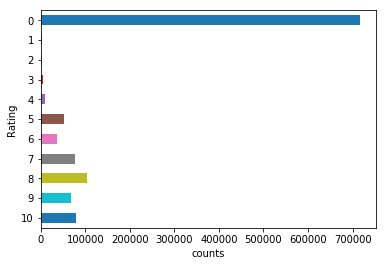

In [22]:
ax = s.plot(kind="barh")
ax.invert_yaxis()
ax.set_xlabel("counts")
ax.set_ylabel("Rating")

We can see there are **WAY** more 0 ratings given than any other value...  
Will probably need to tidy this up to get decent performance. Are these just null values? Like, should the rating scale just be from 1 - 10?

## Proceed with 0-ratings removed from dataset

In [23]:
data2 = data[data['Book-Rating'] > 0]

In [24]:
data2.shape

(433671, 11)

You can see that the dataset size has shrunk from ca. 1.15 million rows to 433 thousand - i.e. the ca. 700 thousand zero-rated entries have been removed.

### Data overview

In [25]:
tot_users = data2['User-ID'].nunique()
tot_books = data2['ISBN'].nunique()

print(f'Unique users: {tot_users} | Unique books: {tot_books}')

Unique users: 77805 | Unique books: 185973


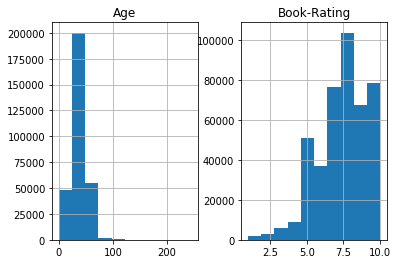

In [26]:
hist = data2[['Age', 'Book-Rating']].hist()

In [27]:
data2.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Age                    float64
City                    object
State                   object
Country                 object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
dtype: object

In [28]:
# Convert ISBN entries to floats (can't convert to ints as there is no NaN support for ints in Pandas)
data2['ISBN'] = pd.to_numeric(data2['ISBN'], errors='coerce')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
data2.dtypes

User-ID                  int64
ISBN                   float64
Book-Rating              int64
Age                    float64
City                    object
State                   object
Country                 object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
dtype: object

In [30]:
data2['ISBN'].isnull().sum()

36342

There are 36,342 missing ISBN entries in our dataset.

Can we clean this by linking other entries of the same Title/Author/Year and grabbing the ISBN associated with *that* entry???

# Collaborative Filtering method

Initially, I'll remove all of the other fields except 'User-ID', 'ISBN', and 'Book-Rating' as those are all we need for a basic collaborative filtering model.

In [31]:
data3 = data2[['User-ID', 'ISBN', 'Book-Rating']]
data3.head()

,User-ID,ISBN,Book-Rating
1,276726,1.550612e+08,5
3,276729,NaN,3
4,276729,5.217950e+08,6
6,276736,3.257224e+09,8
7,276737,6.005710e+08,6


_**Note**_: ISBN numbers are currently 13 digits long, but used to be 10. Any ISBN that isn't 10 or 13 digits long is probably an error that should be handled somehow. Any that are 9 digits long might actually be SBN numbers (pre-1970), and can be converted into ISBN's by just pre-fixing with a zero.

Different ISBN's are assigned to different formats of the same book; for example, an e-book, paperback, or hardcover or Pride & Prejudice would each have a different ISBN.

The ISBN number is actually encoded info about the 'group', 'title', and 'publisher'... but not sure if I need to extract that info for this project.

## Split data into testing and training sets

In [32]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(data3, test_size=0.25)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
test_data.head()

,User-ID,ISBN,Book-Rating
158487,35859,380717581.0,7
754067,182403,684195305.0,8
984958,236655,330412264.0,8
1003599,240906,399138412.0,8
570604,137007,NaN,9


In [34]:
# Need to re-name columns so that they are valid names for named tuples
col_names = ['user', 'book', 'rating']
test_data.columns = col_names

In [35]:
test_data.head()
test_data.dtypes

user        int64
book      float64
rating      int64
dtype: object

In [36]:
for i in test_data[:10].itertuples():
    print(f'First: {i[1]}, 2: {i[2]}, 3: {i[3]}')

First: 35859, 2: 380717581.0, 3: 7
First: 182403, 2: 684195305.0, 3: 8
First: 236655, 2: 330412264.0, 3: 8
First: 240906, 2: 399138412.0, 3: 8
First: 137007, 2: nan, 3: 9
First: 244627, 2: nan, 3: 8
First: 113955, 2: 380702843.0, 3: 8
First: 262208, 2: 374311013.0, 3: 10
First: 53520, 2: 671000306.0, 3: 5
First: 227654, 2: 425189465.0, 3: 7


Need to cast the ISBN to int type for the matrix-forming step below. As int doesn't have NaN's, we'll convert them to zeros, then filter out any rows with an ISBN of zero.

In [37]:
test_data['book'] = test_data['book'].fillna(0.0).astype(int)
test_data = test_data[test_data['book'] > 0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
test_data.dtypes

user      int64
book      int64
rating    int64
dtype: object

### Assign each unique 'User-ID' or 'ISBN' an int value starting from 1 that can be mapped back

In [39]:
# Get int mapping for USER
u_unique = test_data.user.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique)}

# Get int mapping for ISBN
b_unique = test_data.book.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique)}

In [40]:
test_data['u_unique'] = test_data['user'].map(test_data_user2idx)
test_data['b_unique'] = test_data['book'].map(test_data_book2idx)

test_data = test_data[['u_unique', 'b_unique', 'rating']]

### Memory-based collaborative filtering

Implementing via this [tutorial](https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html).

Memory based CF can be divided into 2 main approaches:
 - Item-Item CF: "Users who liked this item also liked..."
 - User-Item CF: "Users who are similar to you also liked..."
 
In both cases, you create a user-item matrix built from the entire dataset. We'll create a matrix for each of the training and testing sets, with the users as the rows, the books as the columns, and the rating as the value/entry. Note that this will be a very sparse matrix, as not every user will have watched every movie etc.

In [41]:
# Create user-item matrices
n_users = test_data['u_unique'].nunique()
n_books = test_data['b_unique'].nunique()

# First, create an empty matrix of size USERS x BOOKS (this speeds up the later steps)
test_matrix = np.zeros((n_users, n_books))
# Then, add the appropriate vals to the matrix by extracting them from the df with itertuples
for entry in test_data.itertuples():
    test_matrix[entry[1], entry[2]] = entry[3] # entry[1] is the user-id, entry[2] is the book-isbn

Now the matrix is in the correct format, with the user and book entries encoded from the mapping dict created above!

### Calculating cosine similarity with the 'pairwise distances' function

To determine the similarity between users/items we'll use the 'cosine similarity' which is a common n-dimensional distance metric.

Note: since all of the rating values are positive (1-10 scale), the cosine distances will all fall between 0 and 1.

In [44]:
test_matrix.shape

(32005, 60594)

In [45]:
# This crashed the kernel last time
test_matrix_small = test_matrix[:10, :10]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(test_matrix_small, metric='cosine')
item_similarity = pairwise_distances(test_matrix_small.T, metric='cosine') # .T transposes the matrix (NumPy)

# What about tring 'cosine_similarity'?
# from sklearn.metrics.pairwise import cosine_similarity

If we are looking at similarity between users we need to account for the average behaviour of that individual user. For example, one user may give all movies quite high ratings, whereas one might give all ratings between 3 and 7. These users might otherwise have quite similar preferences.

To do this, we use the users average rating as a 'weighting' factor.

If we are looking at item-based similarity we don't need to add this weighting factor.

We can incorporate this into a ```predict()``` function, like so:

In [46]:
def predict(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

Then can make our predictions!

In [47]:
item_prediction = predict(test_matrix_small, item_similarity, type='item')
user_prediction = predict(test_matrix_small, user_similarity, type='user')

### Evaluation

How are we going to know if this is a good model?

We'll start by just taking the root mean squared error (RMSE) (from sklearn) of predicted values in the test_set (i.e. where we know what the answer should be!).

Since we want to compare only predicted ratings that are in the test set, we can filter out all other predictions with ```prediction[ground_truth.nonzero()]```.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

# Call on test set to get error from each approach ('user' or 'item')
print(f'User-based CF RMSE: {rmse(user_prediction, test_data_matrix)}')
print(f'Item-based CF RMSE: {rmse(item_prediction, test_data_matrix)}')

Although memory-based CF is simple to implement, they don't scale very well! (Hence why some of these steps were so computationally expensive). Moreover, they fail to address the classic 'cold-start problem' - i.e. to provide recommendations to a new user with no review/rating history. 

Conversly, model-based CF methods are scalable and can deal with higher sparsity level than memory-based models. However, they still suffer for new users ('cold-start').

## Model-based CF